In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt   #We use matplotlib library for plotting
import matplotlib.image as mpimg  
import matplotlib.colors as clr
import os
import numpy as np 
import cv2 as cv

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [24]:
imgs = []
folder = "test_data"

for filename in sorted(os.listdir(folder)):
    print(filename)
    img = cv.imread(os.path.join(folder,filename))
    if img is not None:
        imgs.append(img)

.DS_Store
.ipynb_checkpoints
roi_1.png
roi_2.png
roi_3.png
screws_005.png
screws_006.png
screws_009.png
screws_021.png
screws_037.png
screws_047.png
screws_075.png
screws_084.png
screws_375.png
ting_roi.png


17
17
42
2
2
2
8
6
4
5
8
8
34


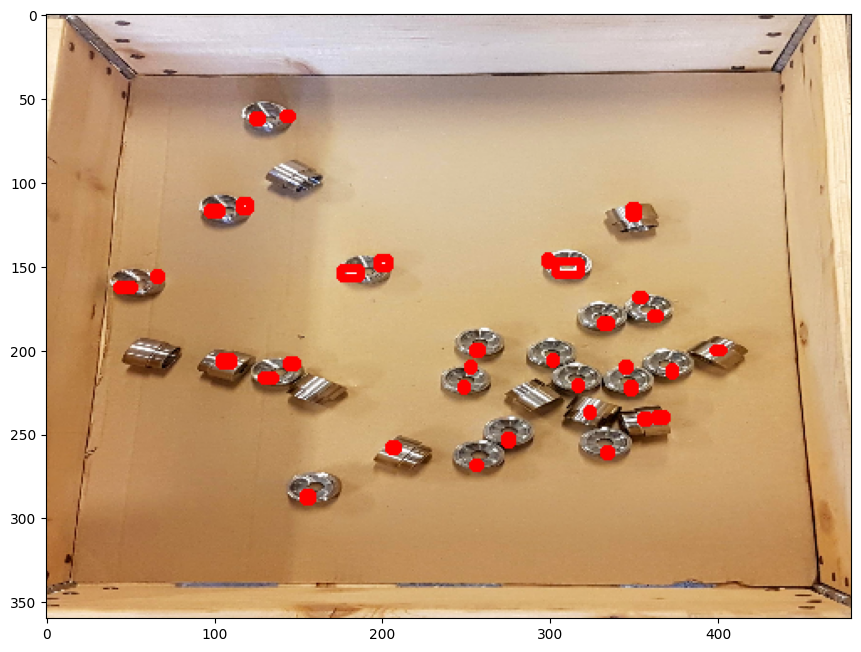

In [25]:
for img in imgs:
    
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (480, 360))
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    median = cv.medianBlur(gray, 3)
    kernel = np.ones((3,3),np.uint8)

    dilation = cv.morphologyEx(median, cv.MORPH_DILATE, kernel)
    closing = cv.morphologyEx(dilation, cv.MORPH_CLOSE, kernel)
    _, thresh = cv.threshold(closing, 250, 255, cv.THRESH_BINARY)
    
    fidelity = False
    fidelityValue = 1.7

    copy1 = img.copy()
    c, h = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    fidelityRange = 0
    if fidelity:
        maxArea = .0
        for i in c: # With images it is convenient to know the greater area
            area = cv.contourArea(i)
            if area > maxArea:
                maxArea = area
        fidelityRange = maxArea - (maxArea * fidelityValue) # If objects have same size it prevents false detection

    totalContours = 0

    br = []
    for i in range(len(c)):
        if h[0][i][3] == -1 and cv.contourArea(c[i]) >= fidelityRange:
            totalContours += 1
            approx = cv.approxPolyDP(c[i], 3, True)
            br.append(cv.boundingRect(approx))
    for b in br:
        cv.rectangle(copy1, (b[0], b[1]), (b[0] + b[2], b[1] + b[3]), (255, 0, 0), 3) 
    plt.imshow(copy1, cmap = 'gray')
    print(totalContours)